# Phase 3 Data Science Training Notebook

In [1]:
import pandas as pd
import numpy as np

## Exploratory Data Analysis

In [2]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data_batch_1 = unpickle('.\data\cifar-10-batches-py\data_batch_1')
data_batch_2 = unpickle('.\data\cifar-10-batches-py\data_batch_2')
data_batch_3 = unpickle('.\data\cifar-10-batches-py\data_batch_3')
data_batch_4 = unpickle('.\data\cifar-10-batches-py\data_batch_4')
data_batch_5 = unpickle('.\data\cifar-10-batches-py\data_batch_5')
test_batch = unpickle('.\data\cifar-10-batches-py\\test_batch')

In [4]:
d1 = pd.DataFrame(data_batch_1[b'data'])
d2 = pd.DataFrame(data_batch_2[b'data'])
d3 = pd.DataFrame(data_batch_3[b'data'])
d4 = pd.DataFrame(data_batch_4[b'data'])
d5 = pd.DataFrame(data_batch_5[b'data'])

training_data = pd.concat([d1,d2,d3,d4,d5])
training_labels = np.concatenate([data_batch_1[b'labels'],data_batch_2[b'labels'],data_batch_3[b'labels'],data_batch_4[b'labels'],data_batch_5[b'labels']])
training_data.shape

(50000, 3072)

In [5]:
data_batch_1[b'data'][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

In [6]:
data_batch_1[b'data'][0].shape

(3072,)

Reshape to visualize images

In [7]:
image = data_batch_1[b'data'][0]
image = image.reshape(3,32,32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [8]:
image = image.transpose(1,2,0)
print(image.shape)
image

(32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

visualize

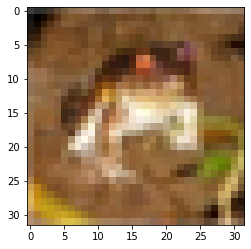

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image)

(50000, 32, 32, 3)


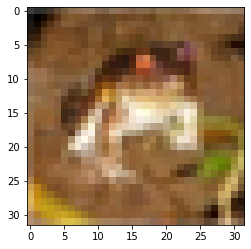

In [10]:
data = training_data
data = data.values.reshape(len(data),3,32,32).transpose(0,2,3,1)
print(data.shape)
plt.imshow(data[0])

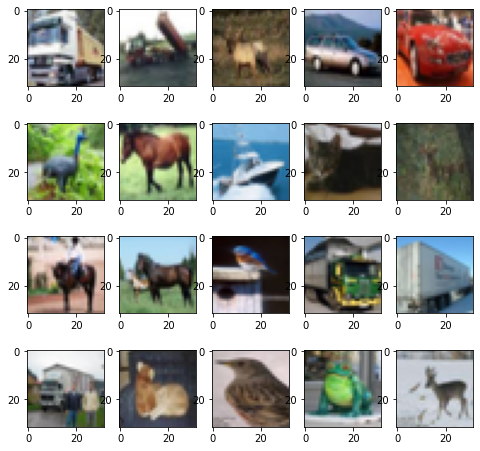

In [11]:
columns = 5
rows = 4
fig = plt.figure(figsize=(8,8))
for i  in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(data[i])
plt.show()

In [12]:
differentLables = training_labels
image_index_array = [[],[],[],[],[],[],[],[],[],[]]
number_of_label_found = [0,0,0,0,0,0,0,0,0,0]

for i in range(len(differentLables)):
    if number_of_label_found[(differentLables[i])] < 5:
        number_of_label_found[(differentLables[i])] = number_of_label_found[(differentLables[i])] + 1
        image_index_array[differentLables[i]].append(i)


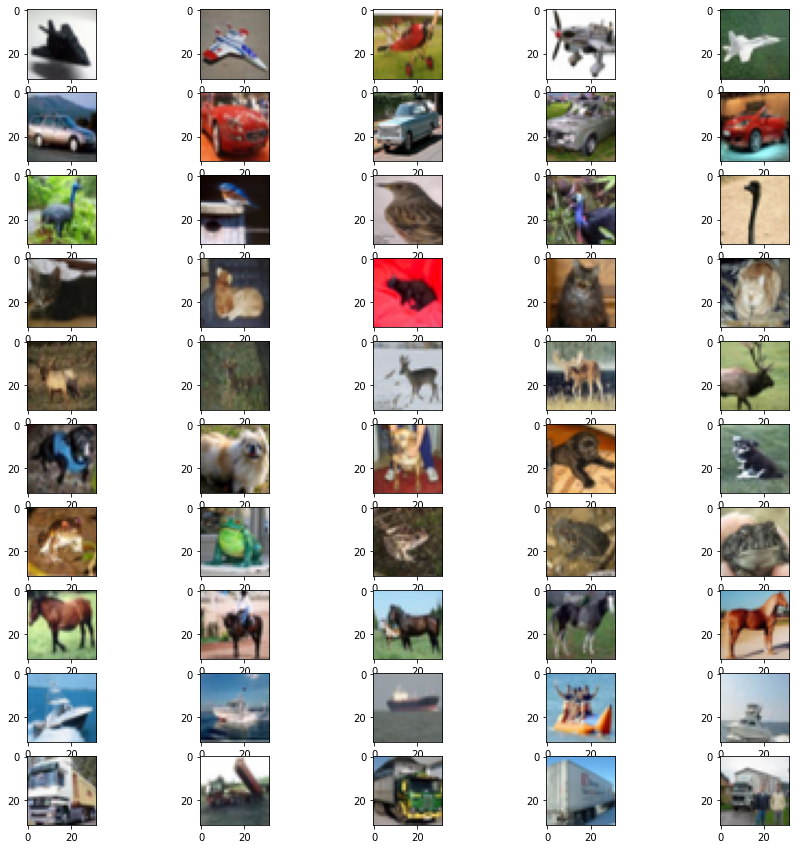

In [13]:
columns = 5
rows = 10
pos = 1
fig = plt.figure(figsize=(15,15))
for i  in range(10):
    for j in range(5):
        fig.add_subplot(rows, columns, pos)
        plt.imshow(data[image_index_array[i][j]])
        pos = pos + 1
plt.show()

I am going to pick my label to be horses

# Data Processing

(10000, 32, 32, 3)


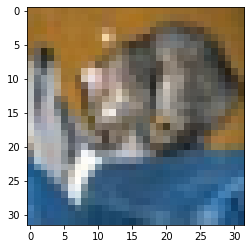

In [14]:
test_data = test_batch[b'data']
test_data = test_data.reshape(len(test_data),3,32,32).transpose(0,2,3,1)
print(test_data.shape)
plt.imshow(test_data[0])

In [15]:
horse_test_data = []
non_horse_test_data = []
testing_data_merged = []

for i in range(len(test_batch[b'labels'])):
    add = []
    if ((test_batch[b'labels'][i] == 7) & (len(horse_test_data) < 1000)):
        add.append(test_batch[b'labels'][i])
        add.append(test_data[i])
        testing_data_merged.append(add)
        horse_test_data.append(add)
    elif ((len(non_horse_test_data) < 1000) & (test_batch[b'labels'][i] != 7) ):
        add.append(test_batch[b'labels'][i])
        add.append(test_data[i])
        non_horse_test_data.append(add)
        testing_data_merged.append(add)

In [16]:
testing_data_merged = pd.DataFrame(testing_data_merged)

testing_data_merged.shape

(2000, 2)

In [17]:
testing_data_merged[0].value_counts()

7    1000
6     131
0     120
9     117
8     116
3     115
2     109
1     100
4      97
5      95
Name: 0, dtype: int64

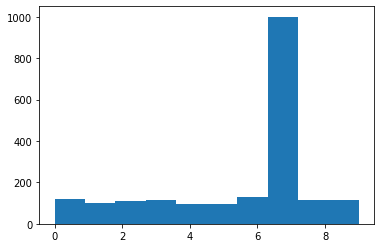

In [18]:
plt.hist(testing_data_merged[0], bins = 10)
plt.show()

this looks as there is no data imbalance for test data set

In [19]:
horse_test_data = 0
non_horse_test_data = 0
training_data_merged = []

for i in range(len(training_labels)):
    add = []
    if ((training_labels[i] == 7) & (horse_test_data < 5000)):
        add.append(training_labels[i])
        add.append(data[i])
        training_data_merged.append(add)
        horse_test_data = horse_test_data + 1
    elif ((non_horse_test_data < 5000) & (training_labels[i] != 7) ):
        add.append(training_labels[i])
        add.append(data[i])
        non_horse_test_data = non_horse_test_data + 1
        training_data_merged.append(add)

In [20]:
training_data_merged = pd.DataFrame(training_data_merged)

training_data_merged.shape

(10000, 2)

In [21]:
training_data_merged[0].value_counts()

7    5000
6     580
2     570
8     570
9     568
4     567
0     559
3     542
5     536
1     508
Name: 0, dtype: int64

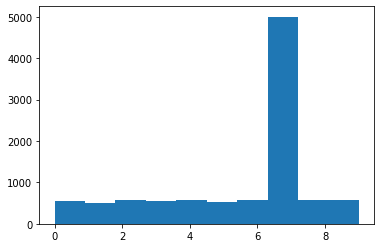

In [22]:
x = training_data_merged[0]
plt.hist(x, bins = 10)
plt.show()

plot shows that the number of different labels is balanced for the training dataset

In [23]:
from sklearn.utils import shuffle
training_data_merged = training_data_merged.sample(frac=1).reset_index(drop=True)
testing_data_merged = testing_data_merged.sample(frac=1).reset_index(drop=True)

In [24]:
train_x = training_data_merged[1]
train_y = training_data_merged[0]

test_x = testing_data_merged[1]
test_y = testing_data_merged[0]

print(train_y.value_counts)
print(test_y.value_counts)

<bound method IndexOpsMixin.value_counts of 0       4
1       7
2       9
3       7
4       7
       ..
9995    5
9996    4
9997    5
9998    3
9999    7
Name: 0, Length: 10000, dtype: int32>
<bound method IndexOpsMixin.value_counts of 0       7
1       8
2       7
3       5
4       0
       ..
1995    4
1996    1
1997    7
1998    7
1999    7
Name: 0, Length: 2000, dtype: int64>


5


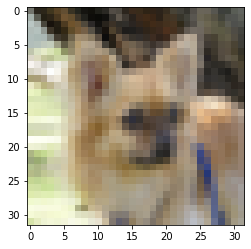

In [25]:
plt.imshow(test_x[3])
print(test_y[3])

In [26]:
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

In [27]:
from array import array

def relabel(arr):
    for i in range(len(arr)):
        if (arr[i] == 7):
            arr[i] = 1
        else:
            arr[i] = 0


In [28]:
relabel(train_y)
relabel(test_y)

In [29]:
def makeArray(arra):
    newArr = []
    for i in range(len(arra)):
        newArr.append(np.array(arra[i]))
    return newArr

In [30]:
test_x = makeArray(test_x)
test_x = np.array(test_x)

train_x = makeArray(train_x)
train_x = np.array(train_x)

# Data Modelling

In [32]:
import tensorflow as tf
# just keras tensorflow.python.keras
from keras import Input, layers, Sequential, optimizers, losses, callbacks, models
from datetime import datetime

In [41]:
def generateModel(hp=None):

    model = Sequential(name="Horse_recognition_model")
    model.add(Input(shape=(32,32,3))) # Input layer.

    model.add(layers.Rescaling(scale=1./255, name="Normaliser"))

    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation="relu"))

    model.add(layers.Dense(1, activation="sigmoid", name="Output_Probability"))

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss=losses.BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [44]:
cnn = generateModel()

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d%H%M%S") + "/"

# Callbacks for QoL.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs/fit/", histogram_freq=1)
earlystop_callback = callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

In [45]:
cnn.fit(train_x, train_y,
    validation_data=(test_x, test_y),
    epochs=200,
    batch_size=10000, # Set this to a lower number if your computer spec is bad.
    callbacks=[tensorboard_callback, earlystop_callback],
    verbose=2 # Uncomment this line to reduce the printing on console.
)


Epoch 1/200
1/1 - 1s - loss: 0.6923 - accuracy: 0.5133 - val_loss: 0.6881 - val_accuracy: 0.5085 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 1s - loss: 0.6865 - accuracy: 0.5064 - val_loss: 0.7614 - val_accuracy: 0.5000 - 620ms/epoch - 620ms/step
Epoch 3/200
1/1 - 1s - loss: 0.7613 - accuracy: 0.5001 - val_loss: 0.6677 - val_accuracy: 0.5625 - 634ms/epoch - 634ms/step
Epoch 4/200
1/1 - 1s - loss: 0.6666 - accuracy: 0.5633 - val_loss: 0.6874 - val_accuracy: 0.5130 - 606ms/epoch - 606ms/step
Epoch 5/200
1/1 - 1s - loss: 0.6845 - accuracy: 0.5104 - val_loss: 0.6997 - val_accuracy: 0.5055 - 622ms/epoch - 622ms/step
Epoch 6/200
1/1 - 1s - loss: 0.6958 - accuracy: 0.5030 - val_loss: 0.6709 - val_accuracy: 0.5480 - 608ms/epoch - 608ms/step
Epoch 7/200
1/1 - 1s - loss: 0.6675 - accuracy: 0.5481 - val_loss: 0.6490 - val_accuracy: 0.6725 - 608ms/epoch - 608ms/step
Epoch 8/200
1/1 - 1s - loss: 0.6464 - accuracy: 0.6999 - val_loss: 0.6502 - val_accuracy: 0.5975 - 601ms/epoch - 601ms/step
Epoch 9/200
1/

In [46]:
cnn.evaluate(test_x,np.array(test_y))

63/63 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8405


[0.359890341758728, 0.840499997138977]

In [47]:
y_pred = cnn.predict(test_x)
y_pred[:10]

63/63 [==============================] - 0s 2ms/step


array([[0.72524655],
       [0.07345794],
       [0.8588658 ],
       [0.683675  ],
       [0.02533096],
       [0.44088623],
       [0.9435507 ],
       [0.40554687],
       [0.21084544],
       [0.15204075]], dtype=float32)

In [50]:
test_y[:10]

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [51]:
cnn.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets


INFO:tensorflow:Assets written to: output/my_model\assets


# advanced features

## Hyperparameter model tuning

In [56]:
import keras_tuner
import keras_tuner as kt

In [57]:
cnn.evaluate(test_x,np.array(test_y))

63/63 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8405


[0.359890341758728, 0.840499997138977]

In [58]:
tune = kt.RandomSearch(
    generateModel,
    objective='accuracy',
    max_trials=30,
    directory='tune',
    project_name='hyperparameter')

tune.search(train_x, train_y,
             epochs=30,
             validation_data=(test_x, test_y))

INFO:tensorflow:Reloading Oracle from existing project tune\hyperparameter\oracle.json


INFO:tensorflow:Reloading Oracle from existing project tune\hyperparameter\oracle.json


INFO:tensorflow:Reloading Tuner from tune\hyperparameter\tuner0.json


INFO:tensorflow:Reloading Tuner from tune\hyperparameter\tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [59]:
tunedModel = tune.hypermodel.build(tune.get_best_hyperparameters()[0])

In [60]:
tunedModel.fit(train_x, train_y,
          validation_data=(test_x, test_y),
          epochs=200,
          batch_size=1000, # Set this to a lower number if your computer spec is bad.
          callbacks=[tensorboard_callback, earlystop_callback],
          verbose=2 # Uncomment this line to reduce the printing on console.
          )

Epoch 1/200
10/10 - 1s - loss: 0.6984 - accuracy: 0.5422 - val_loss: 0.6681 - val_accuracy: 0.6155 - 971ms/epoch - 97ms/step
Epoch 2/200
10/10 - 1s - loss: 0.6390 - accuracy: 0.6807 - val_loss: 0.6123 - val_accuracy: 0.6800 - 628ms/epoch - 63ms/step
Epoch 3/200
10/10 - 1s - loss: 0.5875 - accuracy: 0.7087 - val_loss: 0.5721 - val_accuracy: 0.7235 - 640ms/epoch - 64ms/step
Epoch 4/200
10/10 - 1s - loss: 0.5473 - accuracy: 0.7378 - val_loss: 0.5335 - val_accuracy: 0.7430 - 626ms/epoch - 63ms/step
Epoch 5/200
10/10 - 1s - loss: 0.5164 - accuracy: 0.7572 - val_loss: 0.5099 - val_accuracy: 0.7560 - 651ms/epoch - 65ms/step
Epoch 6/200
10/10 - 1s - loss: 0.4971 - accuracy: 0.7635 - val_loss: 0.4914 - val_accuracy: 0.7705 - 622ms/epoch - 62ms/step
Epoch 7/200
10/10 - 1s - loss: 0.4829 - accuracy: 0.7731 - val_loss: 0.4907 - val_accuracy: 0.7565 - 630ms/epoch - 63ms/step
Epoch 8/200
10/10 - 1s - loss: 0.4734 - accuracy: 0.7767 - val_loss: 0.4782 - val_accuracy: 0.7730 - 621ms/epoch - 62ms/step


In [61]:
cnn.evaluate(test_x,np.array(test_y))

63/63 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8405


[0.359890341758728, 0.840499997138977]

In [62]:
tunedModel.evaluate(test_x,np.array(test_y))

63/63 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8605


[0.3335241675376892, 0.8604999780654907]

## python function to resize a image to 32x32 so the model can predict if it is a horse

In [63]:
from PIL import Image

In [64]:
def imageConverter(pic):
    pic = pic.resize((32,32), Image.ANTIALIAS)
    pic = np.array(pic)
    pic = pic[:,:,:3]
    pic = pic.reshape(32, 32, 3)
    return tunedModel.predict(np.array([pic]))

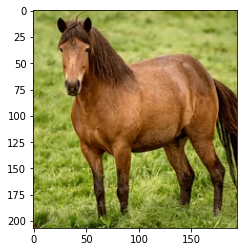

In [79]:
pic = Image.open('horsePic3.png')
plt.imshow(pic)

In [80]:
imageConverter(pic)[0]

1/1 [==============================] - 0s 17ms/step


C:\Users\joshu\AppData\Local\Temp\ipykernel_1636\3250282076.py:2: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  pic = pic.resize((32,32), Image.ANTIALIAS)


array([0.9817666], dtype=float32)